# TASK 5

NAME: L E Sree Sai Praneeth Goud


In [1]:
import pandas as pd

# File path
file_path = r"C:\Users\goud3\Downloads\complaint\complaints.csv"  

# Define chunk size
chunk_size = 10000  # Read 10,000 rows at a time

# Read the CSV in chunks
chunks = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunks.append(chunk)

# Combine all chunks
df = pd.concat(chunks, ignore_index=True)

# Display basic info
print(df.info())  
print(df.head())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8198810 entries, 0 to 8198809
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.1+

In [2]:
df = df[['Consumer complaint narrative', 'Product']]  # Keep only required columns
df = df.dropna(subset=['Consumer complaint narrative'])  # Remove missing complaints


In [3]:
import pandas as pd

# File path
file_path = r"C:\Users\goud3\Downloads\complaint\complaints.csv"

# Read only the first 5 rows
df_test = pd.read_csv(file_path, nrows=5)

# Now print columns
print(df_test.columns)



Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatization
    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goud3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goud3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goud3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
import pandas as pd

file_path = r"C:\Users\goud3\Downloads\complaint\complaints.csv"

# Count total rows in CSV (excluding header)
total_rows = sum(1 for row in open(file_path, encoding="utf-8", errors="replace")) - 1  
chunk_size = 10000  # Number of rows per chunk

# Calculate expected number of chunks
total_chunks = total_rows // chunk_size + (total_rows % chunk_size > 0)

print(f"Total rows in file: {total_rows}")
print(f"Expected number of chunks: {total_chunks}")


Total rows in file: 15000153
Expected number of chunks: 1501


In [50]:
import pandas as pd

file_path = r"C:\Users\goud3\Downloads\complaint\complaints.csv"  # Update your file path
output_file = "first_100_rows_cleaned.csv"  # File to store first 100 rows
chunk_size = 10000  # Process 10,000 rows per chunk
processed_chunks = []  # Store processed chunks
stored_rows = 0  # Track stored row count
chunk_counter = 1  # Track processing progress

for chunk in pd.read_csv(file_path, usecols=['Consumer complaint narrative', 'Product'], chunksize=chunk_size, encoding="utf-8", on_bad_lines="skip"):
    print(f"\nProcessing Chunk {chunk_counter}...")  # Show progress
    chunk_counter += 1

    # Drop missing values in 'Consumer complaint narrative' column
    chunk = chunk.dropna(subset=['Consumer complaint narrative'])
    
    # Apply text cleaning function
    chunk['Cleaned_Text'] = chunk['Consumer complaint narrative'].astype(str).apply(clean_text)  
    
    # Select only remaining rows needed to reach 100
    remaining_rows = 100000 - stored_rows
    chunk_to_store = chunk.head(remaining_rows)

    # Append to processed chunks list
    processed_chunks.append(chunk_to_store)
    stored_rows += len(chunk_to_store)

    print(f"✅ Chunk processed successfully! Stored {stored_rows}/100000 rows.")

    # Stop processing once we have 100 rows
    if stored_rows >= 100000:
        break

# Combine and save the processed data
df_cleaned = pd.concat(processed_chunks, ignore_index=True)
df_cleaned.to_csv(output_file, index=False)

print("\n✅ All chunks processed successfully! First 100 rows saved to", output_file)
print(df_cleaned.head())  # Show final processed data



Processing Chunk 1...
✅ Chunk processed successfully! Stored 635/100000 rows.

Processing Chunk 2...
✅ Chunk processed successfully! Stored 1133/100000 rows.

Processing Chunk 3...
✅ Chunk processed successfully! Stored 1941/100000 rows.

Processing Chunk 4...
✅ Chunk processed successfully! Stored 2690/100000 rows.

Processing Chunk 5...
✅ Chunk processed successfully! Stored 3516/100000 rows.

Processing Chunk 6...
✅ Chunk processed successfully! Stored 3615/100000 rows.

Processing Chunk 7...
✅ Chunk processed successfully! Stored 3852/100000 rows.

Processing Chunk 8...
✅ Chunk processed successfully! Stored 4274/100000 rows.

Processing Chunk 9...
✅ Chunk processed successfully! Stored 4795/100000 rows.

Processing Chunk 10...
✅ Chunk processed successfully! Stored 5124/100000 rows.

Processing Chunk 11...
✅ Chunk processed successfully! Stored 5728/100000 rows.

Processing Chunk 12...
✅ Chunk processed successfully! Stored 6167/100000 rows.

Processing Chunk 13...
✅ Chunk proces

In [54]:
print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       100000 non-null  object
 1   Consumer complaint narrative  100000 non-null  object
 2   Cleaned_Text                  100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None
                                             Product  \
0  Credit reporting or other personal consumer re...   
1  Credit reporting or other personal consumer re...   
2  Credit reporting or other personal consumer re...   
3                                    Debt collection   
4  Credit reporting or other personal consumer re...   

                        Consumer complaint narrative  \
0  ALL REPORTED DATA MUST BE COMPLETE, CORRECT, A...   
1  In accordance with the Fair Credit Reporting a...   
2  I recently received a copy of my credit rep

In [113]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# File path
file_path = r"C:\Users\goud3\Downloads\complaint\complaints.csv"

# Read only 100,000 rows
df_cleaned = pd.read_csv(file_path, usecols=['Consumer complaint narrative', 'Product'], nrows=100000)

# Drop missing values
df_cleaned = df_cleaned.dropna(subset=['Consumer complaint narrative', 'Product'])

# Apply text cleaning
df_cleaned['Cleaned_Text'] = df_cleaned['Consumer complaint narrative'].astype(str).apply(clean_text)

# Define category mapping
category_map = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

# Apply category mapping
df_cleaned['Category'] = df_cleaned['Product'].map(category_map)

# Drop rows where 'Category' is missing
df_cleaned = df_cleaned.dropna(subset=['Category'])

# Convert 'Category' to integer
df_cleaned['Category'] = df_cleaned['Category'].astype(int)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=20000)

# Fit and transform the dataset
X = vectorizer.fit_transform(df_cleaned['Cleaned_Text'])

# Extract labels
y = df_cleaned['Category'].values

# Display final shape of X and y
print(f"✅ TF-IDF Transformation completed! Shape: {X.shape}")
print(f"✅ Labels prepared successfully! Shape: {y.shape}")


✅ TF-IDF Transformation completed! Shape: (429, 3646)
✅ Labels prepared successfully! Shape: (429,)


In [115]:
print("🔹 Columns in df_cleaned:", df_cleaned.columns)


🔹 Columns in df_cleaned: Index(['Product', 'Consumer complaint narrative', 'Cleaned_Text', 'Category'], dtype='object')


In [116]:
print(df_cleaned[['Product', 'Category']].head(20))


                                                 Product  Category
328                                      Debt collection         1
2187                                     Debt collection         1
2922                                     Debt collection         1
5237                                     Debt collection         1
5838                                            Mortgage         3
6164                                     Debt collection         1
6282                                            Mortgage         3
6527                                     Debt collection         1
6613                                     Debt collection         1
6836                                     Debt collection         1
7540                                     Debt collection         1
7709                                     Debt collection         1
7789                                     Debt collection         1
7835                                     Debt collection      

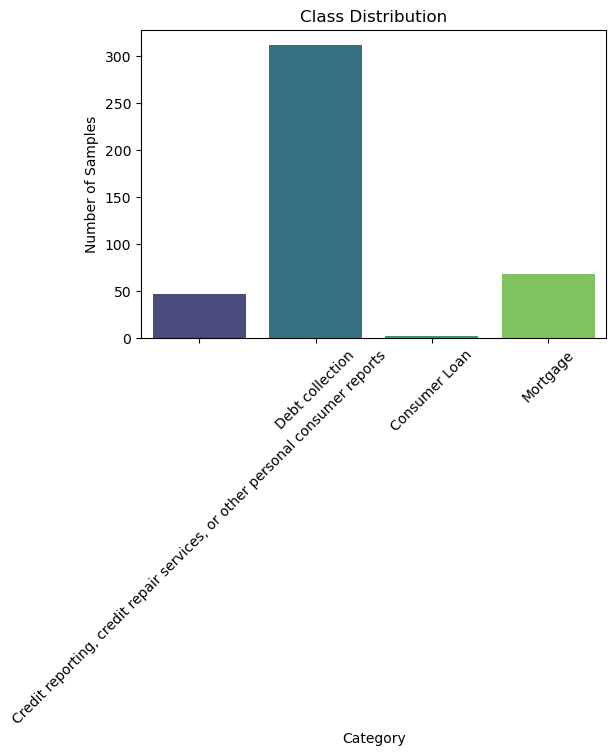

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.xticks(ticks=range(len(category_map)), labels=list(category_map.keys()), rotation=45)
plt.show()


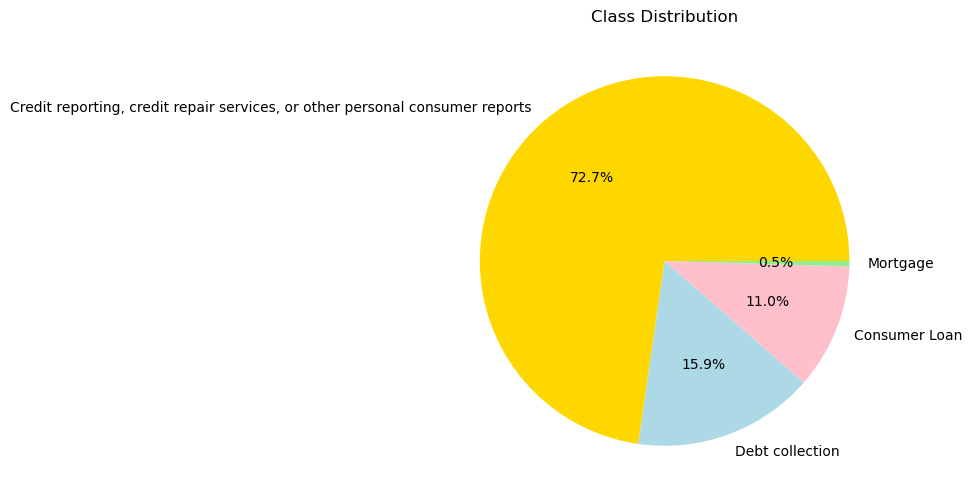

In [131]:
import matplotlib.pyplot as plt

# Plot class distribution before SMOTE
plt.figure(figsize=(6,6))
plt.pie(pd.Series(y).value_counts(), labels=list(category_map.keys()), autopct='%1.1f%%', colors=['gold', 'lightblue', 'pink', 'lightgreen'])
plt.title("Class Distribution")
plt.show()


In [117]:
print(f"🔹 Total missing values in y: {pd.Series(y).isna().sum()}")


🔹 Total missing values in y: 0


In [118]:
print(df_cleaned['Category'].unique())


[1 3 0 2]


In [119]:
from sklearn.model_selection import train_test_split

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data split successfully! Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


✅ Data split successfully! Training samples: 343, Testing samples: 86


In [120]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and Evaluate Each Model
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    print(f"\n✅ {name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))  # Show detailed classification report



🔹 Training Naive Bayes...

✅ Naive Bayes Performance:
Accuracy: 0.7093
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.71      1.00      0.83        61
           3       0.00      0.00      0.00        12

    accuracy                           0.71        86
   macro avg       0.24      0.33      0.28        86
weighted avg       0.50      0.71      0.59        86


🔹 Training Logistic Regression...

✅ Logistic Regression Performance:
Accuracy: 0.7791
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.76      1.00      0.87        61
           3       1.00      0.50      0.67        12

    accuracy                           0.78        86
   macro avg       0.59      0.50      0.51        86
weighted avg       0.68      0.78      0.71        86


🔹 Training Random Forest...


C:\Users\goud3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\goud3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\goud3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\goud3\anaconda3\Lib\site-packages\sklearn\metr


✅ Random Forest Performance:
Accuracy: 0.7907
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.77      1.00      0.87        61
           3       1.00      0.50      0.67        12

    accuracy                           0.79        86
   macro avg       0.92      0.53      0.56        86
weighted avg       0.84      0.79      0.73        86



In [121]:
from sklearn.model_selection import cross_val_score

best_model = LogisticRegression(max_iter=200)  # Use the best-performing model
cv_scores = cross_val_score(best_model, X, y, cv=5)

print(f"\n✅ Cross-Validation Accuracy: {cv_scores.mean():.4f}")


C:\Users\goud3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



✅ Cross-Validation Accuracy: 0.8158


In [122]:
print("\n🔹 Distribution of Classes in y_train:")
print(pd.Series(y_train).value_counts())

print("\n🔹 Distribution of Predictions:")
print(pd.Series(y_pred).value_counts())



🔹 Distribution of Classes in y_train:
1    251
3     56
0     34
2      2
dtype: int64

🔹 Distribution of Predictions:
1    79
3     6
0     1
dtype: int64


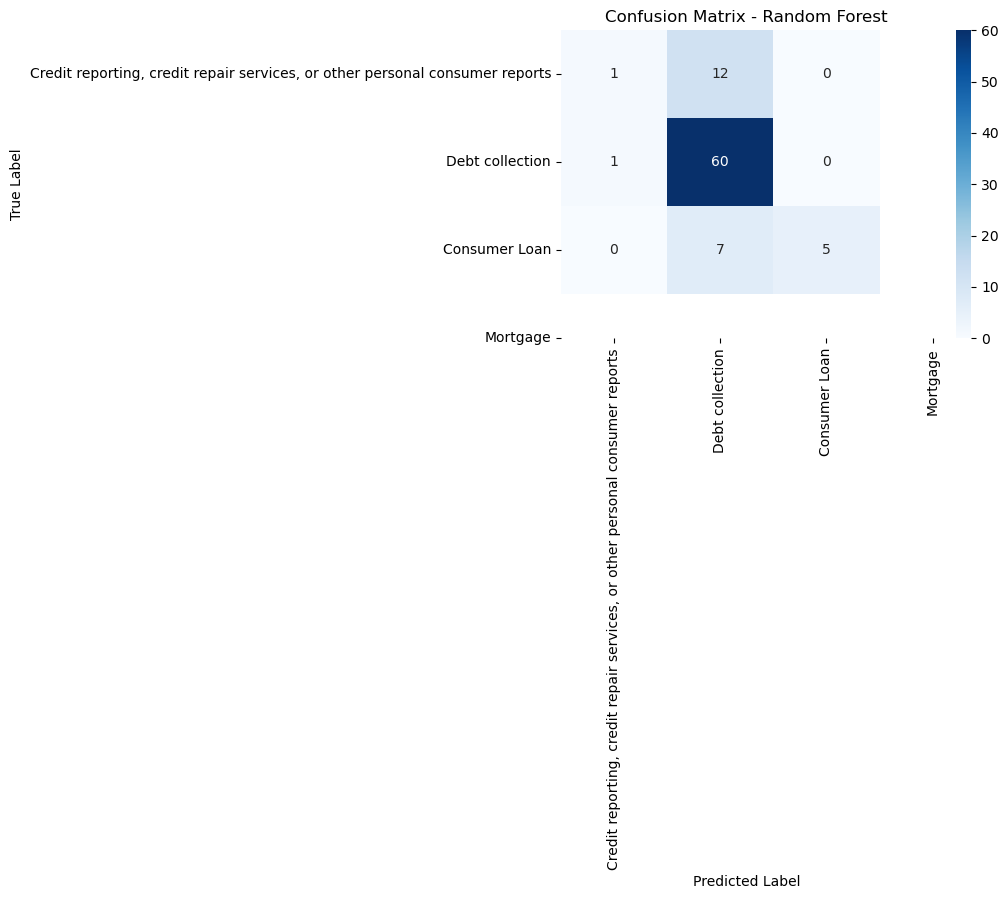

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class balancing
best_model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
best_model.fit(X_train, y_train)

# Make predictions again
y_pred = best_model.predict(X_test)

# Recompute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(category_map.keys()), yticklabels=list(category_map.keys()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


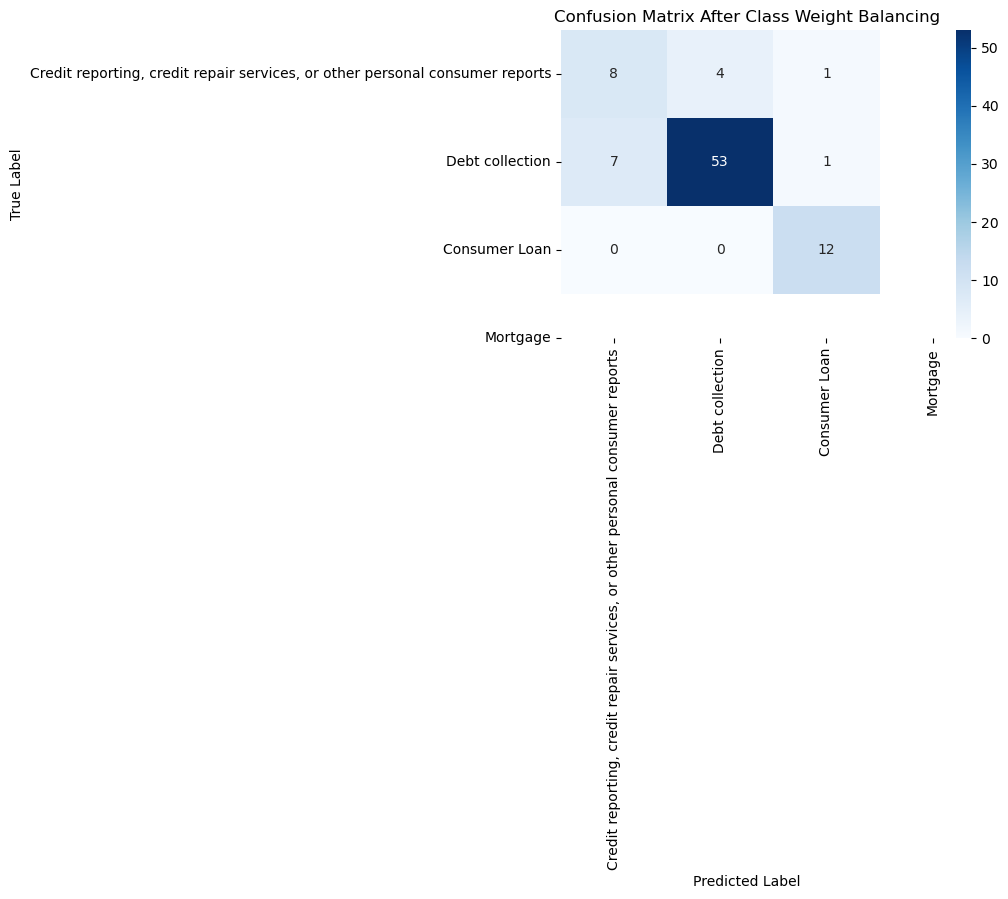

In [124]:
from sklearn.linear_model import LogisticRegression

# Train a balanced model
best_model = LogisticRegression(max_iter=200, class_weight="balanced")
best_model.fit(X_train, y_train)

# Make predictions again
y_pred = best_model.predict(X_test)

# Recompute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot updated confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(category_map.keys()), yticklabels=list(category_map.keys()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix After Class Weight Balancing")
plt.show()


In [125]:
print("\n🔹 Distribution of Predictions:")
print(pd.Series(y_pred).value_counts())



🔹 Distribution of Predictions:
1    57
0    15
3    14
dtype: int64


In [126]:
def predict_category(text):
    processed_text = clean_text(text)  # Clean input text
    vectorized_text = vectorizer.transform([processed_text])  # Convert to numerical format
    prediction = best_model.predict(vectorized_text)  # Predict category
    return prediction[0]

# Example prediction
sample_text = "I have been charged unfairly on my credit report!"
predicted_label = predict_category(sample_text)

# Print result
print(f"Predicted Category: {predicted_label} ({list(category_map.keys())[predicted_label]})")


Predicted Category: 1 (Debt collection)


In [127]:
test_texts = [
    "My credit score dropped suddenly, and I don't know why.",
    "I am being harassed by debt collectors for a loan I never took.",
    "I have issues with my mortgage payment and need help.",
    "I applied for a loan, but it got rejected without any reason."
]

for text in test_texts:
    predicted_label = predict_category(text)
    print(f"🔹 Complaint: {text}")
    print(f"✅ Predicted Category: {predicted_label} ({list(category_map.keys())[predicted_label]})\n")


🔹 Complaint: My credit score dropped suddenly, and I don't know why.
✅ Predicted Category: 1 (Debt collection)

🔹 Complaint: I am being harassed by debt collectors for a loan I never took.
✅ Predicted Category: 1 (Debt collection)

🔹 Complaint: I have issues with my mortgage payment and need help.
✅ Predicted Category: 3 (Mortgage)

🔹 Complaint: I applied for a loan, but it got rejected without any reason.
✅ Predicted Category: 3 (Mortgage)

